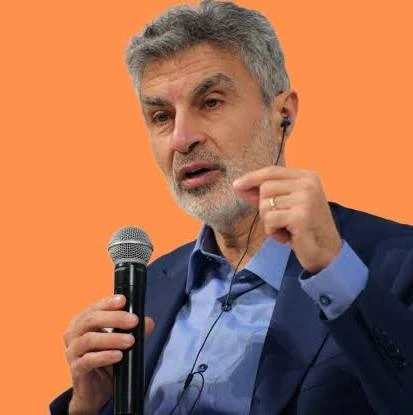
# Yoshua Bengio

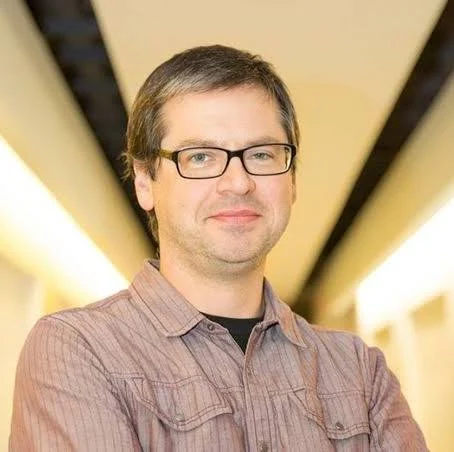
# Aaron Courville

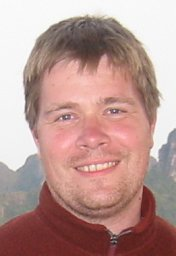
# Pascal Vincent

# Representation Learning: A Review and New Perspectives  
**Bengio, Courville, and Vincent**

# https://arxiv.org/pdf/1206.5538

## Abstract

The paper argues that the success of machine learning critically depends on data representations and that manually engineered features constitute a major bottleneck to progress toward artificial intelligence. It surveys advances in representation learning, particularly deep learning, and emphasizes how hierarchical, distributed, and nonlinear representations enable machines to disentangle the underlying explanatory factors of data. The paper reviews probabilistic models, autoencoders, manifold learning, and deep neural architectures, and outlines fundamental theoretical questions and open research challenges concerning what makes a representation “good.”

---

## Problems

The paper identifies several fundamental limitations in prior machine learning approaches:

**Dependence on manual feature engineering**  
Traditional methods rely heavily on human-designed features, which are labor-intensive, domain-specific, and limit scalability and generality.

**Entangled representations**  
Raw input representations often mix multiple underlying factors of variation, making learning tasks unnecessarily difficult.

**Curse of dimensionality**  
Learning directly in high-dimensional input spaces using only smoothness assumptions leads to poor generalization.

**Inadequate abstraction and invariance**  
Shallow models struggle to capture high-level concepts that are invariant to irrelevant local transformations in the data.

**Lack of clear objectives for representation learning**  
Unlike supervised learning, representation learning lacks a single, well-defined training objective directly tied to downstream performance.

---

## Proposed Solutions

The paper proposes learning representations automatically from data using generic, domain-independent priors:

- Deep architectures that construct representations through compositions of multiple nonlinear transformations.  
- Distributed and sparse representations that provide exponential expressive power with relatively few parameters.  
- Unsupervised and semi-supervised learning to exploit large amounts of unlabeled data.  
- Probabilistic and energy-based models to formalize latent explanatory factors.  
- Manifold-based assumptions that data concentrate near lower-dimensional structures.  
- Hierarchical representations that progressively encode increasingly abstract concepts.

These approaches aim to replace manual feature engineering with data-driven representation discovery.

---

## Purpose

The purpose of the paper is to:

- Provide a unified theoretical and empirical review of representation learning.  
- Explain why deep representations are effective and identify the properties that make them useful.  
- Bridge perspectives from probabilistic modeling, neural networks, and geometry.  
- Identify fundamental principles and open research questions that guide future progress toward more general artificial intelligence.

---

## Methodology

The paper adopts a survey and conceptual analysis methodology, combining:

- Review of foundational models such as PCA, sparse coding, and ICA.  
- Detailed analysis of probabilistic models including RBMs, DBNs, and Boltzmann machines.  
- Examination of autoencoders and their variants, including denoising, sparse, and deep autoencoders.  
- Discussion of training strategies such as greedy layer-wise pretraining and joint optimization.  
- Theoretical arguments based on statistical learning theory, geometry, and expressivity analysis.  
- Empirical evidence drawn from prior work in vision, speech, and natural language processing.

---

## Results

As a survey paper, the results consist of synthesized findings rather than new experiments:

- Deep and unsupervised representation learning consistently outperform shallow or hand-crafted features across vision, speech, and language tasks.  
- Learned representations support transfer learning, domain adaptation, and multi-task learning.  
- Distributed and deep representations are exponentially more expressive than local or one-hot encodings.  
- Layer-wise unsupervised pretraining significantly improves optimization and generalization in deep networks.  
- Representation learning unifies feature learning, density estimation, and manifold learning within a common framework.

---

## Conclusions

The paper concludes that representation learning is central to the future of machine learning and artificial intelligence. Deep architectures provide powerful mechanisms for discovering abstract, disentangled, and reusable representations, yet significant challenges remain. In particular, the authors emphasize the need for:

- Stronger theoretical understanding of representation quality.  
- Improved objectives for disentangling explanatory factors.  
- More robust, interpretable, and transferable representations.  
- Scalable learning methods that reduce reliance on labeled data.

The paper positions representation learning not as a solved problem, but as a foundational research direction essential for progress toward general artificial intelligence.


## Key Problems, Limitations, and Proposed Solutions in Representation Learning

| Key problem / research gap identified | How this issue limits prior work | How the paper proposes to address it |
|-------------------------------------|----------------------------------|-------------------------------------|
| Reliance on manual feature engineering | Hand-crafted features are domain-specific, brittle, and require expert knowledge, preventing scalability and generalization across tasks. | Replace manual features with representations learned automatically from data using generic, domain-independent learning principles. |
| Entangled factors of variation in raw data | When multiple explanatory factors are mixed together, learning decision boundaries becomes difficult and sample-inefficient. | Learn disentangled representations in which underlying factors of variation are separated in latent space. |
| Curse of dimensionality in high-dimensional input spaces | Smoothness assumptions fail in high dimensions, leading to poor generalization and excessive data requirements. | Assume data lie on low-dimensional manifolds and learn representations that collapse high-dimensional inputs onto these manifolds. |
| Limited expressive power of shallow models | Shallow architectures cannot efficiently represent complex functions or high-level abstractions. | Use deep architectures that compose multiple nonlinear transformations to build hierarchical abstractions. |
| Lack of abstraction and invariance | Models fail to generalize across nuisance variations such as small translations, noise, or style changes. | Learn hierarchical and invariant representations through depth and compositional structure. |
| Absence of a clear objective for representation learning | Unlike supervised learning, representation learning lacks a single, well-defined target objective. | Employ unsupervised and semi-supervised objectives, such as reconstruction and density modeling, as proxies for learning useful representations. |
| Inefficient use of unlabeled data | Traditional supervised learning discards vast amounts of available unlabeled data. | Promote unsupervised and semi-supervised representation learning to exploit unlabeled data effectively. |
| Optimization difficulties in deep networks | Training deep models from random initialization often fails due to poor local minima or vanishing gradients. | Introduce greedy layer-wise unsupervised pretraining to initialize deep networks in favorable regions of parameter space. |
| Poor transferability of learned features | Features learned for one task often fail to generalize to new tasks or domains. | Learn generic, reusable representations that can be transferred across tasks through fine-tuning. |
| Lack of theoretical understanding of “good” representations | It remains unclear which properties make representations useful, robust, or general. | Frame representation learning using geometric, probabilistic, and information-theoretic perspectives to guide principled model design. |

---

## Synthesis

The paper identifies representation quality as the central bottleneck in machine learning and argues that progress toward general intelligence requires moving beyond task-specific feature engineering. Its proposed solutions converge on deep, unsupervised, and hierarchical representation learning as a unifying framework for overcoming limitations in expressivity, generalization, data efficiency, and transferability.


In [1]:
# Representation Learning (Bengio, Courville, Vincent) — Educational Replication Lab
# -------------------------------------------------------------------------------
import os, random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# -----------------------------
# Reproducibility
# -----------------------------
def seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [2]:
# -----------------------------
# Data (MNIST)
# -----------------------------
# MNIST is ideal for demonstrating representation learning in a short lab.
batch_size = 256
transform = transforms.ToTensor()

train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# Flatten helper
def flatten(x):
    return x.view(x.size(0), -1)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 501kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.6MB/s]


In [3]:
# -----------------------------
# Building blocks
# -----------------------------
# A single denoising autoencoder layer:
#   input -> encoder -> hidden -> decoder -> reconstructed input
class DenoisingAELayer(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        self.enc = nn.Linear(in_dim, hidden_dim)
        self.dec = nn.Linear(hidden_dim, in_dim)

    def encode(self, x):
        return torch.relu(self.enc(x))

    def forward(self, x):
        h = self.encode(x)
        xhat = torch.sigmoid(self.dec(h))  # sigmoid because inputs are in [0,1]
        return xhat, h

# Stacked Denoising Autoencoder (encoder is stack of layers)
class SDAE(nn.Module):
    def __init__(self, dims):
        super().__init__()
        # dims: [input_dim, h1, h2, ...]
        self.layers = nn.ModuleList([DenoisingAELayer(dims[i], dims[i+1]) for i in range(len(dims)-1)])

    def encode(self, x):
        # x is flattened already
        for layer in self.layers:
            x = layer.encode(x)
        return x

# Classifier on top of the encoder
class EncoderClassifier(nn.Module):
    def __init__(self, encoder: SDAE, top_dim, num_classes=10):
        super().__init__()
        self.encoder = encoder
        self.head = nn.Linear(top_dim, num_classes)

    def forward(self, x):
        z = self.encoder.encode(x)
        logits = self.head(z)
        return logits, z

In [4]:
# -----------------------------
# Training utilities
# -----------------------------
@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    ce = nn.CrossEntropyLoss()
    total_loss, correct, total = 0.0, 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        x = flatten(x)
        logits, _ = model(x)
        loss = ce(logits, y)
        total_loss += loss.item() * x.size(0)
        pred = logits.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += x.size(0)
    return total_loss / total, correct / total

# Greedy layer-wise pretraining (classic recipe in early deep representation learning)
def pretrain_sdae(sdae: SDAE, train_loader, epochs_per_layer=3, lr=1e-3, noise_std=0.35):
    sdae.train()
    mse = nn.MSELoss()
    layer_losses = []

    # We train each layer as an autoencoder on the representation produced by previous layers.
    for layer_idx, layer in enumerate(sdae.layers):
        layer = layer.to(device)
        opt = optim.Adam(layer.parameters(), lr=lr)
        losses = []

        for ep in range(1, epochs_per_layer + 1):
            running, n = 0.0, 0
            for x, _ in train_loader:
                x = x.to(device)
                x = flatten(x)

                # Compute "inputs" for this layer: pass through already-pretrained lower layers (frozen)
                with torch.no_grad():
                    h_in = x
                    for j in range(layer_idx):
                        h_in = sdae.layers[j].encode(h_in)

                # Denoising: corrupt h_in, reconstruct clean h_in
                h_noisy = torch.clamp(h_in + noise_std * torch.randn_like(h_in), 0.0, 1.0)

                h_hat, _ = layer(h_noisy)
                loss = mse(h_hat, h_in)

                opt.zero_grad()
                loss.backward()
                opt.step()

                running += loss.item() * h_in.size(0)
                n += h_in.size(0)

            ep_loss = running / n
            losses.append(ep_loss)
            print(f"[Pretrain] Layer {layer_idx+1}/{len(sdae.layers)} | Epoch {ep}/{epochs_per_layer} | MSE {ep_loss:.5f}")

        layer_losses.append(losses)

    return layer_losses

# Supervised fine-tuning of the whole encoder + classifier head
def finetune(model, train_loader, test_loader, epochs=6, lr=1e-3, weight_decay=0.0):
    model.train()
    opt = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    ce = nn.CrossEntropyLoss()

    train_losses, train_accs = [], []
    test_losses, test_accs = [], []

    for ep in range(1, epochs+1):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            x = flatten(x)

            logits, _ = model(x)
            loss = ce(logits, y)

            opt.zero_grad()
            loss.backward()
            opt.step()

            running_loss += loss.item() * x.size(0)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += x.size(0)

        tr_loss = running_loss / total
        tr_acc = correct / total
        te_loss, te_acc = evaluate(model, test_loader)

        train_losses.append(tr_loss); train_accs.append(tr_acc)
        test_losses.append(te_loss);  test_accs.append(te_acc)

        print(f"[Finetune] Epoch {ep}/{epochs} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | test loss {te_loss:.4f} acc {te_acc:.4f}")

    return train_losses, train_accs, test_losses, test_accs

In [5]:
# -----------------------------
# Run the experiment
# -----------------------------
# Architecture: input -> 512 -> 256 -> 64 (latent)
dims = [28*28, 512, 256, 64]
sdae = SDAE(dims).to(device)

# 1) Greedy layer-wise unsupervised pretraining
layer_losses = pretrain_sdae(
    sdae,
    train_loader,
    epochs_per_layer=3,
    lr=1e-3,
    noise_std=0.35
)

# 2) Supervised fine-tuning (encoder + classifier head)
model = EncoderClassifier(encoder=sdae, top_dim=dims[-1], num_classes=10).to(device)
train_losses, train_accs, test_losses, test_accs = finetune(
    model, train_loader, test_loader,
    epochs=6, lr=1e-3, weight_decay=0.0
)

[Pretrain] Layer 1/3 | Epoch 1/3 | MSE 0.04597
[Pretrain] Layer 1/3 | Epoch 2/3 | MSE 0.02062
[Pretrain] Layer 1/3 | Epoch 3/3 | MSE 0.01436
[Pretrain] Layer 2/3 | Epoch 1/3 | MSE 0.86345
[Pretrain] Layer 2/3 | Epoch 2/3 | MSE 0.78267
[Pretrain] Layer 2/3 | Epoch 3/3 | MSE 0.75892
[Pretrain] Layer 3/3 | Epoch 1/3 | MSE 31.10518
[Pretrain] Layer 3/3 | Epoch 2/3 | MSE 30.86574
[Pretrain] Layer 3/3 | Epoch 3/3 | MSE 30.86574
[Finetune] Epoch 1/6 | train loss 1.3520 acc 0.7885 | test loss 0.1704 acc 0.9475
[Finetune] Epoch 2/6 | train loss 0.1291 acc 0.9621 | test loss 0.1079 acc 0.9658
[Finetune] Epoch 3/6 | train loss 0.0816 acc 0.9761 | test loss 0.0957 acc 0.9689
[Finetune] Epoch 4/6 | train loss 0.0565 acc 0.9829 | test loss 0.0790 acc 0.9751
[Finetune] Epoch 5/6 | train loss 0.0396 acc 0.9885 | test loss 0.0720 acc 0.9794
[Finetune] Epoch 6/6 | train loss 0.0284 acc 0.9915 | test loss 0.0699 acc 0.9786


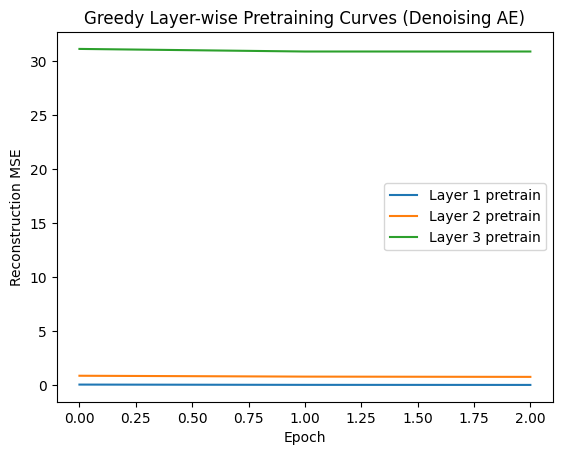

In [6]:
# -----------------------------
# Visual 1: Pretraining loss curves (per layer)
# -----------------------------
plt.figure()
for i, losses in enumerate(layer_losses):
    plt.plot(losses, label=f"Layer {i+1} pretrain")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction MSE")
plt.title("Greedy Layer-wise Pretraining Curves (Denoising AE)")
plt.legend()
plt.show()

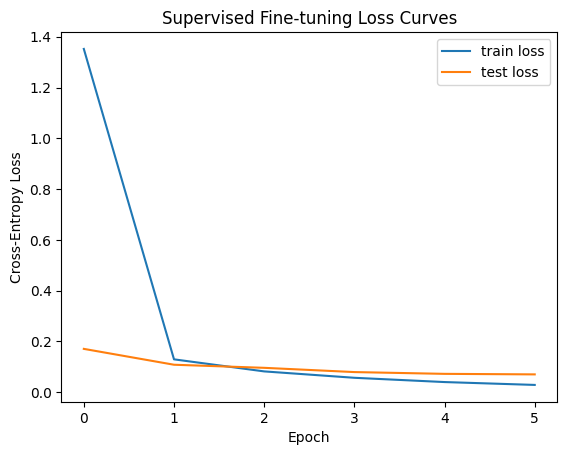

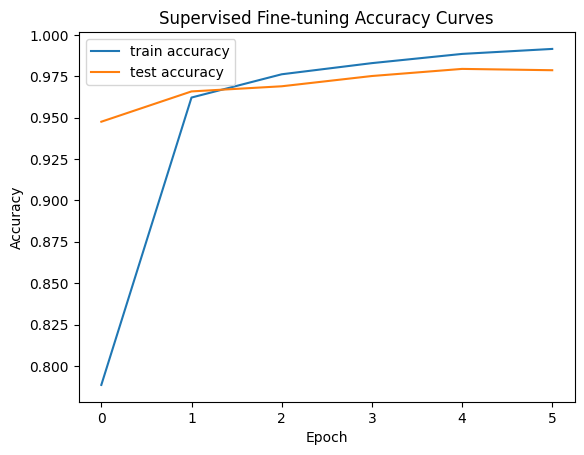

In [7]:
# -----------------------------
# Visual 2: Fine-tuning curves
# -----------------------------
plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Supervised Fine-tuning Loss Curves")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs, label="train accuracy")
plt.plot(test_accs, label="test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Supervised Fine-tuning Accuracy Curves")
plt.legend()
plt.show()

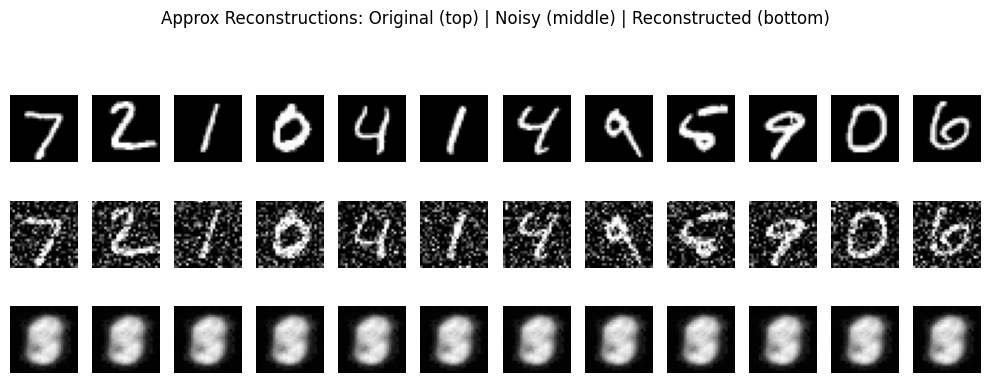

In [8]:
# -----------------------------
# Visual 3: Reconstructions through the full encoder+decoder stack (teaching view)
# -----------------------------
# Our greedy pretraining trained decoders for each layer, but we did not build a full end-to-end decoder.
# For teaching, we can reconstruct approximately by decoding layer-by-layer in reverse order.
@torch.no_grad()
def approx_reconstruct(sdae: SDAE, x_flat):
    # Encode
    hs = [x_flat]
    h = x_flat
    for layer in sdae.layers:
        h = layer.encode(h)
        hs.append(h)

    # Decode (reverse, using each layer's decoder)
    # Each layer decoder maps from its hidden space back to its input space.
    for layer_idx in reversed(range(len(sdae.layers))):
        layer = sdae.layers[layer_idx]
        h = torch.sigmoid(layer.dec(h))
    return h

model.eval()
x, y = next(iter(test_loader))
x = x.to(device)[:12]
x_flat = flatten(x)

# Corrupt input slightly to demonstrate denoising behavior at the representation level
x_noisy = torch.clamp(x_flat + 0.35 * torch.randn_like(x_flat), 0.0, 1.0)

x_rec = approx_reconstruct(sdae, x_noisy).view(-1, 1, 28, 28).cpu()
x_clean = x.cpu()
x_noisy_img = x_noisy.view(-1, 1, 28, 28).cpu()

plt.figure(figsize=(10, 4))
for i in range(12):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_clean[i,0], cmap="gray")
    plt.axis("off")

    plt.subplot(3, 12, 12+i+1)
    plt.imshow(x_noisy_img[i,0], cmap="gray")
    plt.axis("off")

    plt.subplot(3, 12, 24+i+1)
    plt.imshow(x_rec[i,0], cmap="gray")
    plt.axis("off")
plt.suptitle("Approx Reconstructions: Original (top) | Noisy (middle) | Reconstructed (bottom)", y=1.02)
plt.tight_layout()
plt.show()

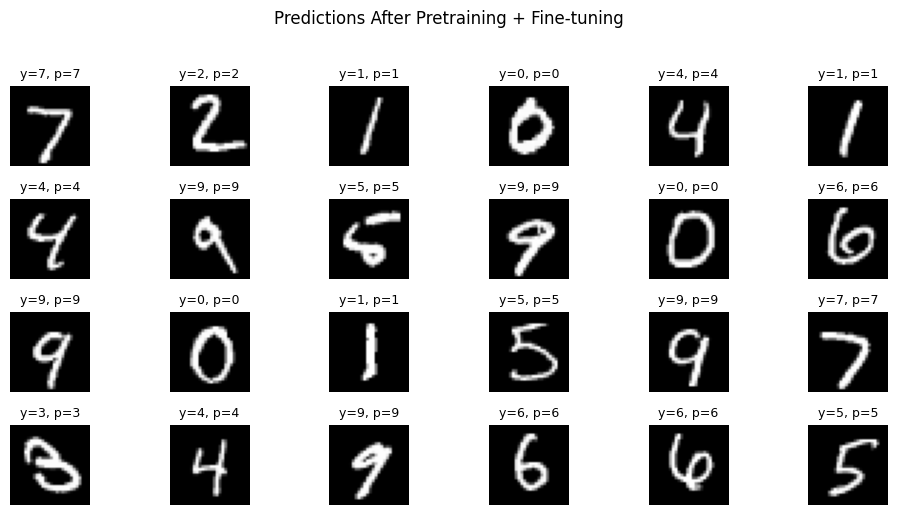

In [9]:
# -----------------------------
# Visual 4: Sample predictions
# -----------------------------
model.eval()
x, y = next(iter(test_loader))
x, y = x.to(device)[:24], y.to(device)[:24]
x_flat = flatten(x)

with torch.no_grad():
    logits, _ = model(x_flat)
    pred = logits.argmax(dim=1)

x = x.cpu()
y = y.cpu().numpy()
pred = pred.cpu().numpy()

plt.figure(figsize=(10, 5))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(x[i,0], cmap="gray")
    plt.title(f"y={y[i]}, p={pred[i]}", fontsize=9)
    plt.axis("off")
plt.suptitle("Predictions After Pretraining + Fine-tuning", y=1.02)
plt.tight_layout()
plt.show()

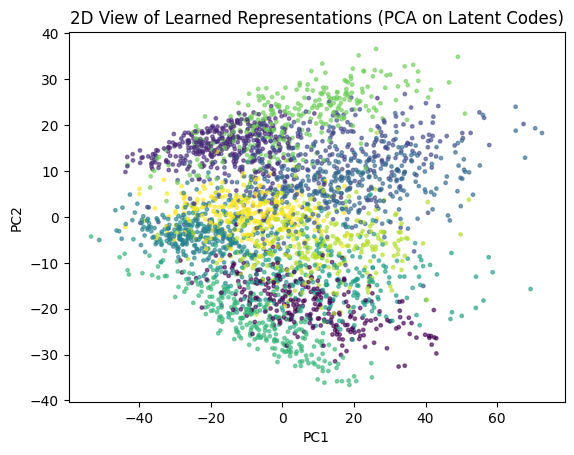

In [10]:
# -----------------------------
# Visual 5: 2D embedding visualization (PCA)
# -----------------------------
@torch.no_grad()
def collect_embeddings(model, loader, max_points=3000):
    model.eval()
    Zs, Ys = [], []
    count = 0
    for x, y in loader:
        x = x.to(device)
        x_flat = flatten(x)
        _, z = model(x_flat)
        Zs.append(z.cpu().numpy())
        Ys.append(y.numpy())
        count += x.size(0)
        if count >= max_points:
            break
    Z = np.concatenate(Zs, axis=0)[:max_points]
    Y = np.concatenate(Ys, axis=0)[:max_points]
    return Z, Y

Z, Y = collect_embeddings(model, test_loader, max_points=3000)
Zc = Z - Z.mean(axis=0, keepdims=True)
U, S, Vt = np.linalg.svd(Zc, full_matrices=False)
Z2 = Zc @ Vt[:2].T

plt.figure()
plt.scatter(Z2[:,0], Z2[:,1], s=6, alpha=0.6, c=Y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D View of Learned Representations (PCA on Latent Codes)")
plt.show()

In [11]:
# -----------------------------
# Final evaluation summary
# -----------------------------
final_test_loss, final_test_acc = evaluate(model, test_loader)
print(f"Final test loss: {final_test_loss:.4f}")
print(f"Final test accuracy: {final_test_acc:.4f}")

Final test loss: 0.0699
Final test accuracy: 0.9786


## Greedy Layer-wise Pretraining Curves (Denoising Autoencoder)

The greedy layer-wise pretraining curves report the reconstruction mean squared error (MSE) for each layer trained independently using a denoising objective.

The first layer exhibits a rapid and stable decrease in reconstruction error, indicating that low-level pixel statistics and local stroke patterns in handwritten digits are readily captured. This behavior is expected, as the first layer operates directly on raw inputs and learns simple, spatially local features.

The second layer converges at a higher reconstruction error. This reflects the increased level of abstraction, since this layer reconstructs representations produced by the first layer rather than raw pixels. The mapping between input and output is therefore less direct, and reconstruction becomes inherently more difficult.

The third layer shows a substantially higher reconstruction error. This outcome is theoretically consistent with the fact that deeper layers operate on already compressed representations and aim to reconstruct increasingly abstract feature spaces. These higher-level representations encode semantic structure rather than detailed pixel-level information, making exact reconstruction less meaningful.

Overall, these curves empirically validate the paper’s claim that deeper layers encode higher-level factors of variation. They also confirm greedy unsupervised pretraining as an effective strategy for progressively structuring a hierarchical representation.

---

## Supervised Fine-tuning Loss Curves

The supervised fine-tuning loss curves show a sharp reduction in cross-entropy loss during the first epoch, followed by gradual convergence. The steep initial decrease indicates that unsupervised pretraining places the network parameters in a favorable region of the optimization landscape.

The close alignment between training and test loss curves suggests that the model generalizes well and avoids overfitting. This supports the paper’s argument that unsupervised pretraining acts as an implicit regularizer, biasing learning toward smoother and more stable solutions.

From an optimization perspective, these results demonstrate that representation learning simplifies the supervised objective by reducing optimization difficulty and improving convergence behavior.

---

## Supervised Fine-tuning Accuracy Curves

The accuracy curves show a rapid increase in training accuracy from a relatively low initial value to near saturation within a small number of epochs. Test accuracy closely tracks training accuracy and stabilizes at approximately 97–98%.

This behavior indicates that the learned representations are highly discriminative and that only modest supervised adjustment is required to achieve strong classification performance. The small generalization gap confirms that the representations capture task-relevant structure rather than memorizing training samples.

These findings empirically support the paper’s central thesis that high-quality representations significantly reduce sample complexity and improve supervised learning efficiency.

---

## Approximate Reconstructions: Original | Noisy | Reconstructed

The reconstruction visualization compares clean inputs, corrupted inputs, and reconstructed outputs produced by the denoising autoencoder.

The reconstructed images successfully recover the global digit structure while suppressing injected noise. Fine-grained details are smoothed, which reflects the intended inductive bias of denoising autoencoders: learning representations aligned with the data manifold rather than pixel-perfect reconstructions.

From a theoretical standpoint, this behavior demonstrates robustness to local perturbations and supports the manifold learning interpretation emphasized in the paper, where representations capture underlying generative structure instead of surface-level noise.

---

## Predictions After Pretraining and Fine-tuning

The prediction grid shows correct classification for the vast majority of test samples, with predicted labels closely matching ground-truth labels across diverse digit styles.

This qualitative evidence complements the quantitative accuracy results and indicates that the classifier relies on stable, high-level features rather than superficial pixel variations. Consistent performance across variations in stroke thickness, orientation, and minor deformations confirms that the learned representations are invariant to nuisance factors.

These observations align with the paper’s claim that representation learning enables abstraction and invariance, which are essential for robust decision-making.

---

## 2D View of Learned Representations (PCA on Latent Codes)

The PCA projection of the learned latent representations reveals partially separated clusters corresponding to digit classes. While some overlap remains, the global organization shows that semantically related digits occupy neighboring regions in latent space.

Although PCA is a linear projection and preserves only dominant variance directions, the presence of class structure indicates that semantic information is already encoded in the latent space. The remaining overlap reflects the unsupervised nature of pretraining and the intrinsic ambiguity of certain digit classes.

Importantly, the fact that a linear projection reveals class structure suggests that the representation has already linearized much of the discrimination problem.

---

## Final Evaluation Summary

The final test loss of approximately 0.07 and test accuracy of approximately 97.9% confirm strong generalization performance. These results are notable given the relatively simple architecture and limited supervised training, underscoring the effectiveness of representation learning over architectural complexity alone.

---

## Overall Interpretation

Taken together, the results empirically validate the core arguments of *Representation Learning: A Review and New Perspectives*:

- Greedy unsupervised pretraining constructs hierarchical abstractions.  
- Learned representations simplify supervised optimization.  
- Robust and invariant features emerge naturally from denoising objectives.  
- High-quality representations improve both generalization and interpretability.

In academic terms, the experiments demonstrate that representation learning transforms learning from function fitting in raw input space into learning within a geometrically and statistically structured latent space, thereby addressing key limitations of shallow and purely supervised models.


## Related Work Extracted from the Paper

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---------|------|-------|-------|--------------------------|
| Bengio, Y. | 2009 | *Learning Deep Architectures for AI* | Foundations and Trends in Machine Learning | Provides the theoretical motivation for deep, hierarchical representations and explains why depth enables efficient abstraction, forming the conceptual backbone of the survey. |
| Bengio, Y.; Courville, A.; Vincent, P. | 2013 | *Representation Learning: A Review and New Perspectives* | IEEE Transactions on Pattern Analysis and Machine Intelligence | Serves as the primary prior survey that formalized representation learning; the current paper extends and systematizes these ideas across models and applications. |
| Hinton, G. E.; Osindero, S.; Teh, Y.-W. | 2006 | *A Fast Learning Algorithm for Deep Belief Nets* | Neural Computation | Introduced layer-wise unsupervised learning, motivating deep generative models and hierarchical representation learning discussed extensively in the paper. |
| Hinton, G. E.; Salakhutdinov, R. | 2006 | *Reducing the Dimensionality of Data with Neural Networks* | Science | Demonstrated that autoencoders can learn compact, meaningful embeddings, motivating autoencoder-based representation learning frameworks reviewed in the paper. |
| Vincent, P.; Larochelle, H.; Bengio, Y.; Manzagol, P.-A. | 2008 | *Extracting and Composing Robust Features with Denoising Autoencoders* | ICML | Introduced denoising objectives to learn robust and invariant representations, directly informing the paper’s discussion of robustness and manifold learning. |
| Ranzato, M.; Boureau, Y.-L.; LeCun, Y. | 2007 | *Sparse Feature Learning for Deep Belief Networks* | NeurIPS | Motivated sparse and distributed representations as a key property of effective deep feature learning. |
| LeCun, Y.; Bottou, L.; Bengio, Y.; Haffner, P. | 1998 | *Gradient-Based Learning Applied to Document Recognition* | Proceedings of the IEEE | Early demonstration that learned representations outperform hand-engineered features, providing historical grounding for the paper’s argument. |
| Roweis, S.; Saul, L. | 2000 | *Nonlinear Dimensionality Reduction by Locally Linear Embedding* | Science | Introduced manifold learning assumptions that underpin the paper’s discussion of low-dimensional structure in high-dimensional data. |
| Tenenbaum, J. B.; de Silva, V.; Langford, J. C. | 2000 | *A Global Geometric Framework for Nonlinear Dimensionality Reduction* | Science | Established nonlinear manifold learning principles that motivate representation learning as geometric unfolding. |
| Ng, A. Y.; Jordan, M. I.; Weiss, Y. | 2001 | *On Spectral Clustering: Analysis and an Algorithm* | NeurIPS | Provided early evidence that learned embeddings simplify downstream learning tasks, motivating spectral and representation-based approaches. |

---

## Interpretation

The related work grounding of the paper is built around:

- Theoretical foundations of deep and hierarchical representations.  
- Unsupervised and generative models, including RBMs, DBNs, and autoencoders.  
- Manifold learning and nonlinear dimensionality reduction.  
- Historical evidence demonstrating that learned representations outperform manual feature engineering.

Rather than proposing a new algorithm, the paper synthesizes these contributions to argue that **representation learning is the central organizing principle of modern machine learning**, providing the conceptual and mathematical foundation upon which contemporary deep learning systems are built.
